In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import splat
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import tqdm

from popsims.plot_style import  plot_style

plot_style()
%matplotlib inline


In [2]:
splat.initializeStandards()
ALL_STDS={}

for s in [splat.STDS_DWARF_SPEX, splat.STDS_DSD_SPEX,\
          splat.STDS_ESD_SPEX, splat.STDS_INTG_SPEX,
          splat.STDS_SD_SPEX]:
    ALL_STDS.update(s)
#ALL_STDS

In [3]:
#short names for visually confirmed ugly spectra 
bad_spectra=['J01073875-1314137', 'J01481478+1202447',
            'J02481204+2445141', 'J034325482+31551656', 'J034350565+32031800',
            'J03435925+3202502', 'J03441386+3156539', 'J034426561+32082064',
             'J03442694+3203494', 'J03442694+3203494','J03451604+3205141',
             'J03452212+3205450', 'J03452212+3205450', 'J034445206+32011971',
             'J04123277+1044083','J06211484+6558164', 'J11321822-3018316',
             'J20575592-0050060', 'J19165762+0509021', 'J17461199+50340362',
             'J17224432+6329470', 'J16134550+1708270', 'J15551573-0956055',
             'J15394189-0520428', 'J14351087-2333025', 'J14162409+1348267',
             'J13271521+0759375', 'J130831063+08185225', 'J12414645-2238178',
             'J11240487+3808054','J10492244+01255930', 'J07342571+3006583',
             'J06074213+4550370', 'J04430581-3202089', 'J04364275+1901348',
             'J2320292+412341','J21324036+1029494', 'J21304463-08452049',
             'J2047247+142152', 'J2035203-311008', 'J18000116-1559235',
             'J17461199+50340362','J17343053-1151388','J17224432+6329470',
             'J16545079+3747146', 'J16184503-1321297',
             'J16134550+1708270', 'J15551573-0956055', 'J15394189-0520428',
             'J14351087-2333025', 'J14162409+1348267', 'J10492244+01255930',
             'J07342571+3006583', 'J06022216+6336391', 'J03511847-1149326',
             'J01020186+0355405', 'J11473434+215359', 'J11473434+2153590',
            'J11491231-0153006', 'J11553951-37273499', 'J12414645-2238178',
            'J13081228+6103486','J130831063+08185225', 'J14162409+1348267',
            'J14351087-2333025', 'J15394189-0520428', 'J15551573-0956055',
            'J16134550+1708270',  'J16545079+3747146', 
            'J17224432+6329470', 'J17343053-1151388','J19165762+0509021',
            'J2035203-311008', 'J2047247+142152', 'J20571538+1715154', \
             'J20575592-0050060',  'J2320292+412341',
            'J05021345+1442367', 'J2047247+142152', 'J20571538+1715154',
            'J11553951-37273499', 'J16452211-1319516', 'J15551573-0956055']

#unresolved binary candidates listed in paper + everything in Table 5 to be safe
binary_candidates=np.unique(['J02361794+0048548', 'J093113.09+280228.9',
'J13114227+3629235', 'J13411160-30525049', 'J14532589+1420418',
'J20261584-2943124', 'J02060879+22355930', 'J04272708-1127143',
'J10365305-3441380', 'J10595138-2113082', 'J142227.20+221557.5',
'J16235970-0508114', 'J170725290-0138093', 'J1711457+223204',
'J000649.16-085246.3','J004757.41+154641.4', 'J00521232+0012172',
' J011912.22+240331.6','J000649.16-085246.3', 'J004757.41+154641.4', 'J00521232+0012172',
'J011912.22+240331.6',
'J020529.62+142114.0',
'J02060879+22355930',
'J02361794+0048548',
'J024749.90-163112.6',
'J03202839-0446358',
'J035104.37+481046.8',
'J04272708-1127143',
'J05185995-2828372',
'J07354882+2720167',
'J080531.84+481233.0',
'J090900.73+652527.2',
'J093113.23+280227.1',
'J09490860-1545485',
'J103931.35+325625.5',
'J10595138-2113082',
'J11061197+2754225',
'J120747.17+024424.8',
'J12144089+6316434',
'J13114227+3629235',
'J13153094-2649513',
'J13243559+6358284',
'J13411160-30525049',
'J141530.05+572428.7',
'J142227.20+221557.5',
'J143553.25+112948.6',
'J143945.86+304220.6',
'J14532589+1420418',
'J151114.66+060742.9',
'J151603.03+025928.9',
'J16235970-0508114',
'J17072529-0138093',
'J17114573+2232044',
'J17310140+5310476',
'J17373467+5953434',
'J20261584-2943124',
'J205235.31-160929.8',
'J21265916+7617440',
'J21392676+0220226',
'J222958.30+010217.2',
'J223348.82+002214.0',
'J235618.01+075420.4',
'J232315.39+071931.0'])

In [4]:
def get_designation(s):
    #print (s)
    coord=splat.designationToCoordinate(s)
    return splat.coordinateToDesignation(coord)

In [5]:
def plot_sp_sp(sp, a, shortname, spex_type):
    #plot a spectrum
    std=ALL_STDS[spex_type]
    
    chi, sc=splat.compareSpectra( sp, std)
    std.scale(sc)
    
    a.plot(sp.wave, sp.flux, c='k', linewidth=4, label=shortname)
    a.plot(std.wave, std.flux, c='#7FDBFF', linewidth=2, label='{} STD'.format(spex_type))
    
    xlim=[0.85, 2.4]
    mask= np.logical_and(sp.wave.value>xlim[0], sp.wave.value<xlim[1])
    ylim= [sp.flux[mask].value.min(), sp.flux.value[mask].max()]
    a.set(xlabel='Wave (micron)', ylabel=' Flux', xlim=xlim, ylim=ylim)
    
    a.legend()
    
def get_spectrum(filename):
    try:
        return splat.getSpectrum(filename=filename)[0]
    except:
        return 
    
def get_shortname(des):
    if '+' in des:
        c=des.split('+')
        return c[0][:5]+'+'+c[1][:4]
    if '-' in des:
        c=des.split('-')
        return c[0][:5]+'-'+c[1][:4]
    
def class_by_standard(sp):
    return splat.classifyByStandard(sp)[0]

In [6]:
%%capture
db= splat.searchLibrary()
spectra= db.DATA_FILE.apply(get_spectrum)

In [7]:
db['SPECTRA']= spectra

In [8]:
db['SPTYPE_BY_STANDARD']=[ class_by_standard(x) for x in tqdm(db.SPECTRA.values)]
db=(db[~db.SPEX_TYPE.isna()]).reset_index(drop=True)

100%|███████████████████████████████████████| 2037/2037 [03:15<00:00, 10.40it/s]


In [9]:
binary_cands_des=[get_designation(x) for x in binary_candidates]

In [10]:
db['FLAG_IS_SPECTRAL_BINARY_CAND']=db.DESIGNATION.isin(binary_cands_des)
db['FLAG_BAD_SPECTRA']= db.DESIGNATION.isin(bad_spectra)

In [11]:
np.unique(db.SPEX_GRAVITY_CLASSIFICATION.values.astype(str))

array(['FLD-G', 'INT-G', 'VL-G', 'nan'], dtype='<U5')

In [12]:
np.unique(db.NOTE_SP.values.astype(str))

array(['Possible J flux calibration problem', 'nan',
       'poor telluric correction'], dtype='<U35')

In [13]:
np.unique(db.SBINARY.astype(str))

array(['Y', 'nan'], dtype=object)

In [14]:
np.unique(db.METALLICITY_CLASS.astype(str))

array(['d/sd', 'esd', 'nan', 'sd'], dtype=object)

In [15]:
db['CLEAN']= np.logical_and.reduce([~db.FLAG_IS_SPECTRAL_BINARY_CAND,
                                    ~db.FLAG_BAD_SPECTRA,
                                    db.SPEX_GRAVITY_CLASSIFICATION=='FLD-G',
                                    db.NOTE.astype(str) =='nan',
                                    db.SBINARY.astype(str)=='nan',
                                    db.METALLICITY_CLASS.astype(str)=='nan'])
                                    

In [16]:
num_types=[splat.typeToNum(x) for x in db.SPTYPE_BY_STANDARD.values]
db=(db.loc[np.argsort(num_types)]).reset_index(drop=True)
#db.SPTYPE_BY_STANDARD[db.CLEAN]

In [17]:
#plot everything in a pdf
def plot_everything(df, filename):
    with PdfPages('/users/caganze/'+filename) as pdf:

        for g in np.array_split(df, int(len(df)/4)):
            

            fig, ax=plt.subplots(ncols=2, nrows=2)
            
            plot_sp_sp(g.SPECTRA.iloc[0], ax[0][0], g.DESIGNATION.iloc[0],  g.SPTYPE_BY_STANDARD.iloc[0] )
            plot_sp_sp(g.SPECTRA.iloc[1], ax[0][1],  g.DESIGNATION.iloc[1], g.SPTYPE_BY_STANDARD.iloc[1] )
            plot_sp_sp(g.SPECTRA.iloc[2], ax[1][0],  g.DESIGNATION.iloc[2], g.SPTYPE_BY_STANDARD.iloc[2])
            plot_sp_sp(g.SPECTRA.iloc[3], ax[1][1],  g.DESIGNATION.iloc[3], g.SPTYPE_BY_STANDARD.iloc[3])
            
            plt.tight_layout()
            pdf.savefig() 
            plt.close()
            


In [18]:
plot_everything(db[db.CLEAN].reset_index(drop=True), filename='clean_spectra.pdf')
plot_everything(db[db.FLAG_BAD_SPECTRA].reset_index(drop=True), filename='bad_spectra.pdf')

In [34]:
import splat.empirical as spe

In [79]:
def get_absolute_mag_j2mass(spt):
    mag=spe.typeToMag(spt, 'MKO J', ref='dupuy2012')
    return mag[0], mag[1]

In [46]:
sp=db.SPECTRA.iloc[0]
WAVEGRID=sp.wave[np.logical_and(sp.wave.value >=0.9, sp.wave.value <=2.4)].value
#WAVEGRID

In [97]:
def measure_fluxes(row):
    try:
        sp=row.SPECTRA
        spt=splat.typeToNum(row.SPTYPE_BY_STANDARD)

        #scale
        m, mer= get_absolute_mag_j2mass(spt)
        sp.fluxCalibrate('MKO J',m)

        #measure mags
        j, jerr=splat.filterMag(sp,'MKO J')
        h, herr=splat.filterMag(sp,'MKO H')


        #interpolate
        interp_flux = np.interp(WAVEGRID, sp.wave.value, sp.flux.value) 
        intepr_noise= np.interp(WAVEGRID, sp.wave.value, sp.noise.value)

        #measure J-SNR
        jsnr=np.nanmedian(sp.flux[np.logical_and(sp.wave.value >=1.1, sp.wave.value <=1.3)].value\
                 /sp.noise[np.logical_and(sp.wave.value >=1.1, sp.wave.value <=1.3)].value)

        return {'WAVEGRID': WAVEGRID,
               'INTERP_FLUX': interp_flux,
               'INTERP_NOISE':  intepr_noise,
               'MKO_J_SYNTH': j,
               'MKO_J_ER_SYNTH': jerr,
                'MKO_H_SYNTH': h,
                'MKO_H_er_SYNTH': herr,
                'SNR_11_13':jsnr
               }
    except ValueError:
        return {'WAVEGRID': None,
               'INTERP_FLUX': None,
               'INTERP_NOISE':  None,
               'MKO_J_SYNTH': None,
               'MKO_J_ER_SYNTH': None,
                'MKO_H_SYNTH': None,
                'MKO_H_er_SYNTH': None,
                'SNR_11_13':None
               }
    

In [98]:
vals= db.apply(measure_fluxes, axis=1)

In [104]:
vals_df=pd.DataFrame([ x for x in vals])

In [107]:
db_small=db.join(vals_df).drop(columns=['SPECTRA'])

[Text(0.5, 0, 'J-H'), Text(0, 0.5, 'J')]

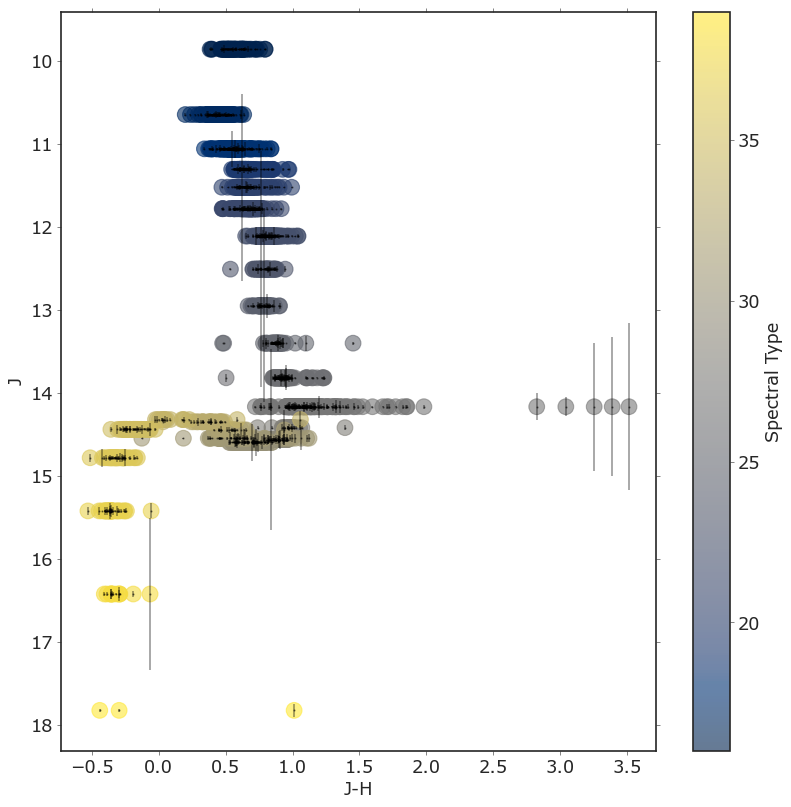

In [155]:
fig, ax=plt.subplots(figsize=(12, 12))


ax.errorbar(db_small.MKO_J_SYNTH-db_small.MKO_H_SYNTH, db_small.MKO_J_SYNTH,ms=1, fmt='o', \
            yerr=db_small.MKO_J_ER_SYNTH, c='k', alpha=0.4)
c=ax.scatter(db_small.MKO_J_SYNTH-db_small.MKO_H_SYNTH, db_small.MKO_J_SYNTH, \
           c=db_small.SPTYPE_BY_STANDARD.apply(splat.typeToNum), s=200,alpha=0.6, cmap='cividis')
plt.colorbar(c, label='Spectral Type')

ax.invert_yaxis()
ax.set(xlabel='J-H', ylabel='J')

In [124]:
db_small.to_hdf('/users/caganze/single_spectra_with_synthphot.h5', key='singles')

[None]

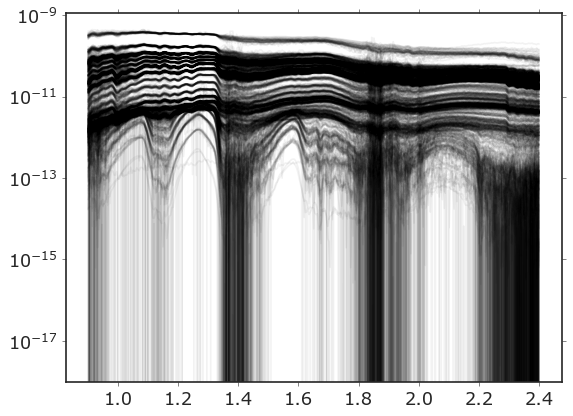

In [136]:
fig, ax=plt.subplots()
for idx, row in db_small.iterrows():
    try:
        ax.plot(row.WAVEGRID, row.INTERP_FLUX, color='k', alpha=0.05)
    except:
        pass
ax.set(yscale='log')

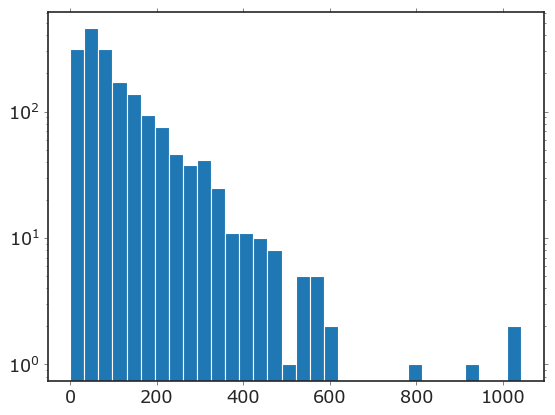

In [138]:
fig, ax=plt.subplots()
_= ax.hist(db_small.SNR_11_13.values, log=True, bins=32)

In [139]:
db_small.columns

Index(['SOURCE_KEY', 'NAME', 'DESIGNATION', 'RA', 'DEC', 'DISCOVERY_REFERENCE',
       'OPT_TYPE', 'OPT_TYPE_REF', 'NIR_TYPE', 'NIR_TYPE_REF', 'LIT_TYPE',
       'LIT_TYPE_REF', 'OBJECT_TYPE', 'J_2MASS', 'J_2MASS_E', 'H_2MASS',
       'H_2MASS_E', 'KS_2MASS', 'KS_2MASS_E', 'JK_EXCESS', 'COLOR_EXTREMITY',
       'LUMINOSITY_CLASS', 'METALLICITY_CLASS', 'GRAVITY_CLASS_OPTICAL',
       'GRAVITY_CLASS_OPTICAL_REF', 'GRAVITY_CLASS_NIR',
       'GRAVITY_CLASS_NIR_REF', 'CLUSTER', 'CLUSTER_REF', 'LIBRARY', 'BINARY',
       'BINARY_REF', 'SBINARY', 'SBINARY_REF', 'COMPANION_NAME',
       'COMPANION_REF', 'SIMBAD_OTYPE', 'SIMBAD_NAME', 'SIMBAD_SPT',
       'SIMBAD_SPT_REF', 'SIMBAD_SEP', 'PARALLAX', 'PARALLAX_E',
       'PARALLEX_REF', 'DISTANCE_PHOT', 'DISTANCE_PHOT_E', 'DISTANCE',
       'DISTANCE_E', 'MU', 'MU_E', 'MU_RA', 'MU_DEC', 'MU_REF', 'VTAN',
       'VTAN_E', 'RV', 'RV_E', 'RV_REF', 'VSINI', 'VSINI_E', 'VSINI_REF',
       'NOTE', 'SELECT', 'DATA_KEY', 'DATA_FILE', 'INSTRUMENT',
     

In [149]:
#scale to the appropriate flux using Dupuy relations
#interpolate on wavegrid (0.9-2.4 micron),
#compute photometric spectro-photometric magnitudes in MKO J and H
#measure J-SNR 1.1-1.3 micron
#
len(db_small)

1893